## Frequency response of 3D-waveguide

In [1]:
import fenics as fen
import mshr

import numpy as np

import PECwg
import helpers

### Create waveguide and set boundary conditions

In [37]:
Lx, Ly, Lz = 1.0, 1.0, 5.0

mu = fen.Expression('1.0', degree=2) # 4*np.pi*1e-7 # magnetic permeability inside waveguide
eps = fen.Expression('1.0', degree=2) # 8.854187e-12 # electric permittivity inside waveguide
g_inlet = fen.Expression(('1.0', '0.0', '0.0'), degree=2)

mesh = fen.BoxMesh(fen.Point(0, 0, 0), fen.Point(Lx, Ly, Lz), 5, 5, 25)

class Inlet(fen.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and fen.near(x[2], 0) and x[0]>0 and x[0]<Lx and x[1]>0 and x[1]<Ly
    
boundary, V, bc = PECwg.create(mesh, Inlet())

3

### Get stiffness and mass matrices and add forcing term

In [36]:
K, M, L = PECwg.setup(boundary, g_inlet, mu, eps, V, bc)

### Observe frequency response

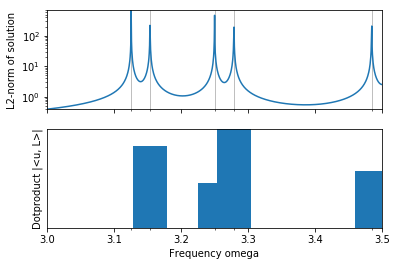

In [37]:
omegas = np.linspace(3, 3.5, 1000)
_, eigvecs, _ = helpers.plot_solution_L2_norms(omegas, K, M, L, V, bc)

In [30]:
A = PECwg.solve(3.23, K, M, L, V)
A.compute_vertex_values().shape

(18513,)

In [31]:
test = eigvecs[0]
test_re = helpers.insert_boundary_values(test, V, bc)
test_re.shape

ValueError: shape mismatch: value array of shape (3650,) could not be broadcast to indexing result of shape (32050,)